In [152]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np
def get_quad(pos_tuple):
    return (pos_tuple[0]>0, pos_tuple[1]>0)

output_dir = "../../../context_embedding_seed_88_time_1_attr_-2_size_100_aux_loss_True/"
json_path = os.path.join(output_dir, "situational_1_predict.json")

In [153]:
data_json = json.load(open(json_path, "r"))

quadrant analysis

In [154]:
pred_x = []
true_x = []
pred_y = []
true_y = []
for example in data_json:
    pred_pos = example['pred_pos']
    true_pos = example['true_pos']
    pred_quad = get_quad(pred_pos)
    true_quad = get_quad(true_pos)
    pred_x += [pred_pos[0]]
    pred_y += [pred_pos[1]]
    true_x += [true_pos[0]]
    true_y += [true_pos[1]]

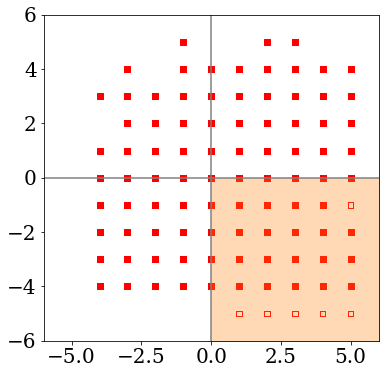

In [155]:
plt.rcParams["font.family"] = "DejaVu Serif"
font = {'family' : 'DejaVu Serif',
        'size'   : 20}
plt.rc('font', **font)
with plt.rc_context({'axes.edgecolor':'black', 'xtick.color':'black', 'ytick.color':'black', 'figure.facecolor':'white'}):
    fig, ax = plt.subplots(1,1, figsize=(6, 6))
    ax.scatter(pred_x, pred_y, marker='s', s=30, c='r', edgecolors='red', lw=1)
    ax.scatter(true_x, true_y, marker='s', s=30, c='none', edgecolors='red', lw=1)
    ax.axhline(0, color='grey')
    ax.axvline(0, color='grey')
    ax.set_xlim(-6, 6)
    ax.set_ylim(-6, 6)
    
    x = np.array([0, 1, 2, 3, 4, 5, 6])
    y1 = np.array([-6]*7)
    y2 = np.array([0]*7)
    ax.fill_between(x, y1, y2, where=(y1 < y2), color='C1', alpha=0.3)
    
    plt.show()

correlation analysis

In [156]:
pos_match_count = 0
pos_unmatch_count = 0
pos_exact_match_count = 0
pos_exact_unmatch_count = 0
quadrant_match_count = 0
for example in data_json:
    pred_pos = example['pred_pos']
    true_pos = example['true_pos']
    pred_quad = get_quad(pred_pos)
    true_quad = get_quad(true_pos)
    if pred_pos == true_pos:
        pos_match_count += 1
        if example['exact_match']:
            pos_exact_match_count += 1
    else:
        pos_unmatch_count += 1
        if example['exact_match']:
            pos_exact_unmatch_count += 1
            
    if pred_quad == true_quad:
        quadrant_match_count += 1

print("****** Summary ******")
print()
print(f"pos_match_count/total_example={pos_match_count}/{len(data_json)}={pos_match_count/len(data_json)}")
print()
print(f"exact_match/pos_match_count={pos_exact_match_count}/{pos_match_count}={pos_exact_match_count/pos_match_count}")
print()
print(f"exact_match/pos_unmatch_count={pos_exact_unmatch_count}/{pos_unmatch_count}={pos_exact_unmatch_count/pos_unmatch_count}")
print()
print(f"quadrant_match/total_example={quadrant_match_count}/{len(data_json)}={quadrant_match_count/len(data_json)}")
print()
print("****** Summary ******")

****** Summary ******

pos_match_count/total_example=1089/8282=0.1314899782661193

exact_match/pos_match_count=411/1089=0.3774104683195592

exact_match/pos_unmatch_count=103/7193=0.014319477269567634

quadrant_match/total_example=3795/8282=0.45822265153344605

****** Summary ******
